In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# New Section

Data collection and Analysis

In [ ]:
diabetes_dataset = pd.read_csv("/content/diabetes.csv")

In [ ]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
correlation = diabetes_dataset.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

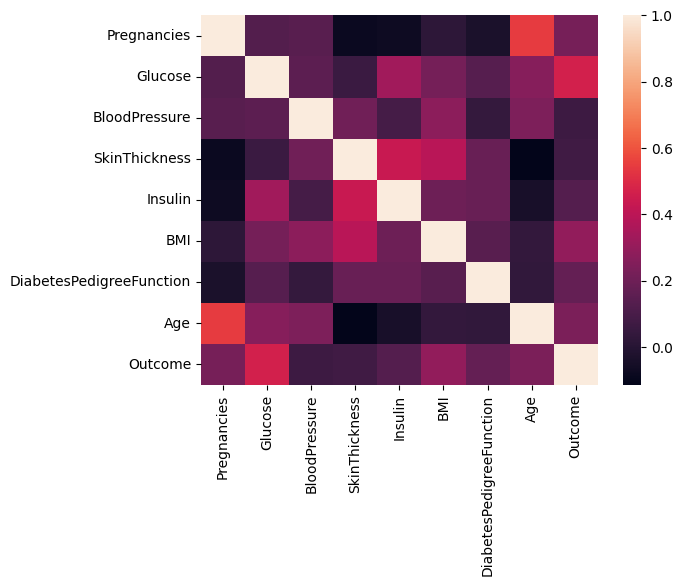

In [ ]:
sns.heatmap(correlation)

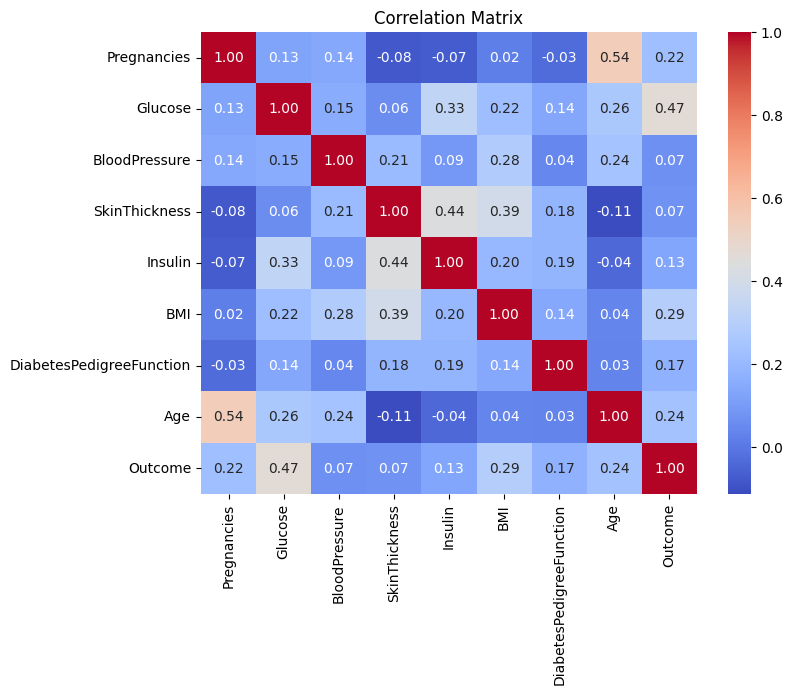

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [ ]:
correlation_matrix = diabetes_dataset.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# correlation matrix
correlation_matrix2 = diabetes_dataset.corr()
print(correlation_matrix2)

In [ ]:
diabetes_dataset.shape

(768, 9)

In [ ]:
diabetes_dataset_1 = diabetes_dataset[['Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

In [ ]:
diabetes_dataset_1.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset_1["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non Diabetes

1 --> Diabetes

In [ ]:
diabetes_dataset_1.groupby("Outcome").mean()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,
0,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


0 is non diabetes that why Glucose level is low

1 is diabetes in data that Glucose level is high than the non-diabetes

In [ ]:
#separating data and labesl
X = diabetes_dataset_1.drop(columns = "Outcome", axis = 1)
Y = diabetes_dataset_1['Outcome']

In [ ]:
print(X)

     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3         89             66             23       94  28.1   
4        137             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763     

In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.84832379  0.14964075  0.90726993 ...  0.20401277  0.46849198
   1.4259954 ]
 [-1.12339636 -0.16054575  0.53090156 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.94372388 -0.26394125 -1.28821221 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.00330087  0.14964075  0.15453319 ... -0.73518964 -0.68519336
  -0.27575966]
 [ 0.1597866  -0.47073225 -1.28821221 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.8730192   0.04624525  0.65635768 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
Y = diabetes_dataset_1['Outcome']

In [ ]:
print(X)
print(Y)

[[ 0.84832379  0.14964075  0.90726993 ...  0.20401277  0.46849198
   1.4259954 ]
 [-1.12339636 -0.16054575  0.53090156 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.94372388 -0.26394125 -1.28821221 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.00330087  0.14964075  0.15453319 ... -0.73518964 -0.68519336
  -0.27575966]
 [ 0.1597866  -0.47073225 -1.28821221 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.8730192   0.04624525  0.65635768 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standization

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 7) (614, 7) (154, 7)


In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(768,) (614,) (154,)


training the model

In [ ]:
classifier = svm.SVC(kernel="linear")

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

In [ ]:
#accuracy score on the training model
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print("Accuracy score of the training model",training_data_accuracy)

Accuracy score of the training model 0.7850162866449512


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print("Accuracy score of the testing model",test_data_accuracy)

Accuracy score of the testing model 0.7662337662337663


In [ ]:
"""
7,194,68,28,0,35.9,0.745,41,1
8,181,68,36,495,30.1,0.615,60,1
1,128,98,41,58,32,1.321,33,1
8,109,76,39,114,27.9,0.64,31,1
"""

'\n7,194,68,28,0,35.9,0.745,41,1\n8,181,68,36,495,30.1,0.615,60,1\n1,128,98,41,58,32,1.321,33,1\n8,109,76,39,114,27.9,0.64,31,1\n'

In [ ]:
input_data = (71,48,18,76,20.4,0.323,22)

#changing the input data into the numpy array data
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instances
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

#standization of input data
std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction  = classifier.predict(std_data)
print(prediction)

if (prediction[0]==0):
  print("The paitient dosen't have diabetes")
else:
  print("The paitient has Diabetes")

[[-1.5615564  -1.09110524 -0.15910711 -0.03299048 -1.47132127 -0.4496241
  -0.95646168]]
[0]
The paitient dosen't have diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
filename = "trained_model_.sav"
pickle.dump(classifier,open(filename,"wb"))

In [ ]:
loaded_model = pickle.load(open("trained_model_.sav","rb"))

In [ ]:
pickle.dump(scaler, open("standard.pkl","wb"))
loaded = pickle.load(open("standard.pkl","rb"))

In [ ]:
input_data = (87,78,27,32,34.6,0.101,22)

#changing the input data into the numpy array data
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instances
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshape)
print(std_data)


prediction  = loaded_model.predict(std_data)
print(prediction)

if (prediction[0]==0):
  print("The paitient dosen't have diabetes")
else:
  print("The paitient has Diabetes")

[[-1.06080207  0.45982725  0.40544544 -0.4150379   0.33093202 -1.12009045
  -0.95646168]]
[0]
The paitient dosen't have diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
